Importing the request libraries

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=False)
import pandas as pd
from wordcloud import WordCloud
from geopy.geocoders import Nominatim
from tqdm import tqdm
from folium.plugins import HeatMap
import folium
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#from mpl_toolkits.basemap import Basemap
import matplotlib.colors as mcolors
import nltk
from sklearn.manifold import TSNE
from gensim.models import word2vec
%matplotlib inline

Using TensorFlow backend.


Loading the dataset

In [3]:
df = pd.read_csv('zomato.csv')
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

Dropping unnecessary url column

In [4]:
df.drop('url',axis=1)

address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
5      37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...   
6      19/1, New Timberyard Layout, Beside Satellite ...   
7      2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
8      1, 30th Main Road, 3rd Stage, Banashankari, Ba...   
9      2470, 21 Main Road, 25th Cross, Banashankari, ...   
10     12,29 Near PES University Back Gate, D'Souza N...   
11     941, 3rd FLOOR, 21st Main, 22nd Cross, Banasha...   
12         6th Block, 3rd Stage, Banashankari, Bangalore   
13     111, Sapphire Toys Building, 100 Feet Ring Roa...   
14     1112, Next to KIMS Medical College, 17th Cross...   
15     2303, 21st Cross, K R Road, 2nd Stage, Banasha...   
16     241, 4th Floor, 100 Feet Ring Road, Opposite K...   
17     405, 24th Cross, 9th Main, 2nd Stage, Banashan...   
18     504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   
19     47, 48 &49, 3Rd Floor, 21st Main Road, 2nd Sta...   
20     146, 50 ft Road, 3rd Phase, 3rd Stage, Near Ka...   
21     3353, 2nd Cross, Opposite Auden School, Hosker...   
22     SRF Complex, Near BDA Complex, Kathreguppe Mai...   
23     224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...   
24     775/1, Opposite Gupta Collage, 7th Block, 3rd ...   
25     101, Water Tank Road, 2nd Block, 3rd Stage, Ba...   
26     27th Cross Rd, Banashankari Stage II, Banashan...   
27     1036, Srinidhi Plaza, 3rd floor, Above Nilgiri...   
28     940, Shantha Complex, 20th Main, 2nd Stage, Ba...   
29     112, Bull Temple Road,next to more Basavanagud...   
...                                                  ...   
51687  4th Floor, Uptown Square, Seegehalli, Near All...   
51688  TR 9, 4th Floor, Plot 95, EPIP Zone, Near Vaid...   
51689  75, Inorbit Mall, EPIP Area, Road 7, Whitefiel...   
51690  223-1, ITPL Main Road, Sadarmangala, KR Puram ...   
51691  Shop FB-02, Upper Ground Floor, Prestige Shant...   
51692  Third Floor, Ascendas Park Square, ITPL Main R...   
51693  87/2A & 87/3, SH 35, Seegehalli, Whitefield, B...   
51694  29, Ground Floor, Phoenix Market City, Whitefi...   
51695          The Waverly Hotels, Whitefield, Bangalore   
51696  TF-01A, Level 3, VR Mall, Mahadevpura, Whitefi...   
51697  Level 2, Phoenix Marketcity, Mahadevpura, Whit...   
51698  3-A1, Kundanahalli Main Road, Mahadevpura, Opp...   
51699  S-10, Level 2, Phoenix Market City, Whitefield...   
51700  Level 2, Phoenix Marketcity, Whitefield, Banga...   
51701  Unit 4A - 4B, Upper Ground Floor, VR Bengaluru...   
51702  2, Graphite India Road, Doddanekundi Industria...   
51703  ITPL Ascendas Park Square Mall, ITPL, First Fl...   
51704  2nd Floor, Phoenix Market City, Whitefield, Ba...   
51705  2nd Floor, Iona, Virginia Mall, Whitefield Mai...   
51706  Poornima Complex, Dodsworth Layout, Whitefield...   
51707  Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...   
51708  Keys Hotel, 6, 1st Phase Industrial Area, Near...   
51709  136, SAP Labs India, KIADB Export Promotion In...   
51710  2E2, 4th Cross Road, Devasandra Industrial Est...   
51711  139/C1, Next To GR Tech Park, Pattandur Agraha...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51713  Number 10, Garudachar Palya, Mahadevapura, Whi...   
51714  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  A

Checking for NULL values

In [5]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

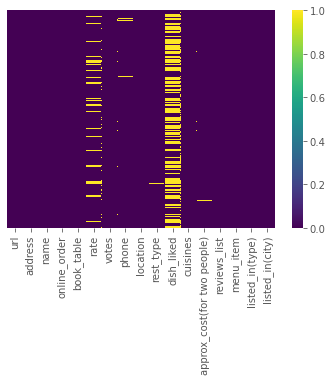

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [7]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

Columns description

1.url: contains the url of the restaurant in the zomato website

2.address: contains the address of the restaurant in Bengaluru

3.name: contains the name of the restaurant

4.online_order: whether online ordering is available in the restaurant or not

5.book_table: table book option available or not

6.rate: contains the overall rating of the restaurant out of 5

7.votes: contains total number of rating for the restaurant as of the above mentioned date

8.phone: contains the phone number of the restaurant

9.location: contains the neighborhood in which the restaurant is located

10.rest_type: restaurant type

11.dish_liked: dishes people liked in the restaurant

12.cuisines: food styles, separated by comma

13.approx_cost(for two people): contains the approximate cost for meal for two people

14.reviews_list: list of tuples containing reviews for the restaurant, each tuple

15.menu_item: contains list of menus available in the restaurant

16.listed_in(type): type of meal

17.listed_in(city): contains the neighborhood in which the restaurant is listed

## Exploratory Data Analysis

### What are the top restaurant chains in Bangalore ? 

Text(0.5, 0, 'Number of outlets')

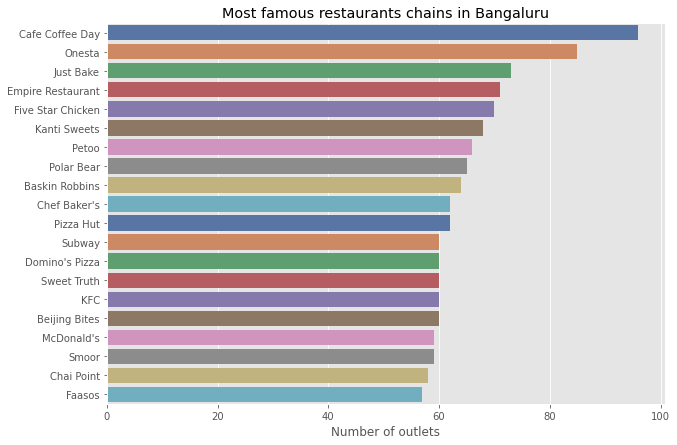

In [8]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

as inferred from the data graph, Cafe coffee day, Onesta and just Bake are having the maximum number of outlets there and considered as most famous brands in Bangalore.

### How  many restaurants not accepting online orders ?

(-1.1257912130359413,
 1.1156309198850047,
 -1.1756966570832281,
 1.1659598131356386)

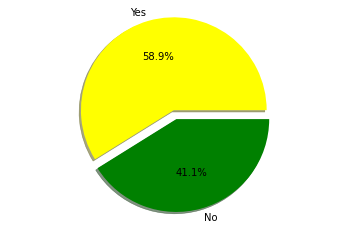

In [9]:
labels = 'Yes','No'
colors = ['yellow','green']
explode=(0.05,0.05)

plt.pie(df['online_order'].value_counts(),labels=labels,colors=colors,shadow=True,autopct='%1.1f%%',explode = explode)
plt.axis('equal')

Most of the restaurants are accepting online orders but there is also a huge number of not accepting.

### What is the ratio of restaurants providing table booking facility ?

(-1.1554119558829397,
 1.1510513662345156,
 -1.088002052804408,
 1.1257240985417483)

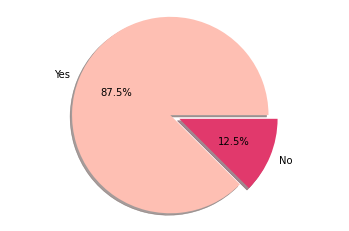

In [10]:
labels = 'Yes','No'
colors = ['#FEBFB3', '#E1396C']
explode=(0.05,0.05)

plt.pie(df['book_table'].value_counts(),labels=labels,colors=colors,shadow=True,autopct='%1.1f%%',explode = explode)
plt.axis('equal')

1.Almost 90 percent of restaurants in Banglore do not provide table booking facility.

2.In India you cannot find table booking facility in any average restaurants,usually only five star restaurants provides table booking.

3.We will inspect this further.

### Rating Distribution

Creating a dist plot for observing the rating distribution

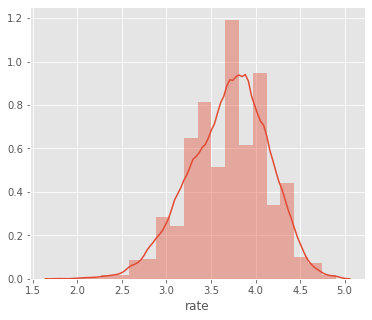

In [11]:
plt.figure(figsize=(6,5))
rating=df['rate'].dropna().apply(lambda x : float(x.split('/')[0]) if (len(x)>3)  else np.nan ).dropna()
sns.distplot(rating,bins=20)

1.Almost more than 50 percent of restaurants has rating between 3 and 4.

2.Restaurants having rating more than 4.5 are very rare.

In [12]:
cost_dist=df[['rate','approx_cost(for two people)','online_order']].dropna()
cost_dist['rate']=cost_dist['rate'].apply(lambda x: float(x.split('/')[0]) if len(x)>3 else 0)
cost_dist['approx_cost(for two people)']=cost_dist['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))

### Cost Vs Rating

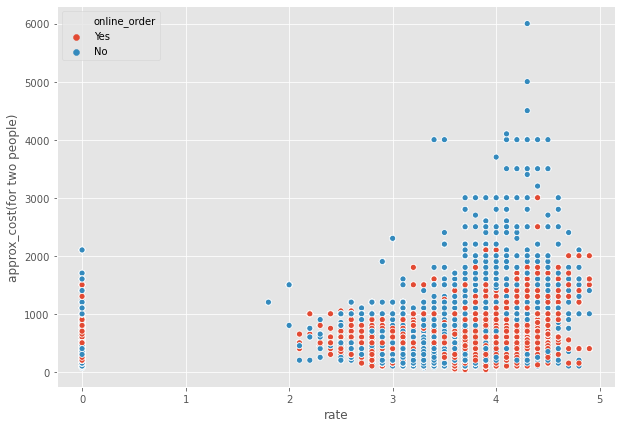

In [13]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=cost_dist)
plt.show()

### Distribution of cost for Two people

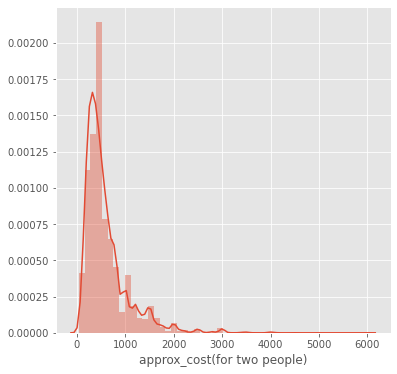

In [14]:
plt.figure(figsize=(6,6))
sns.distplot(cost_dist['approx_cost(for two people)'])
plt.show()

1.We can see that the distribution if left skewed.

2.This means almost 90percent of restaurants serve food for budget less than 1000 INR.($15)

### What is the most common type of restaurant ?  

Text(0.5, 0, 'count')

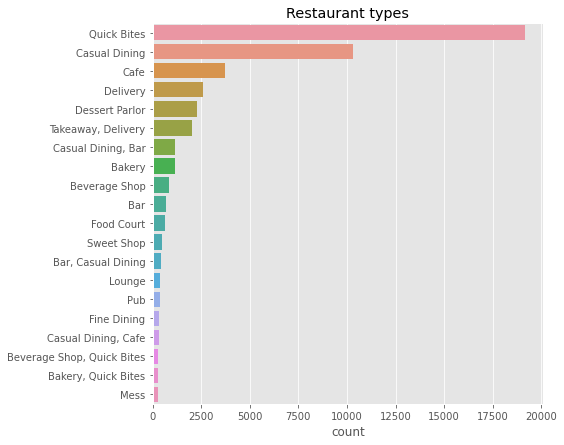

In [15]:
plt.figure(figsize=(7,7))
rest=df['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Restaurant types")
plt.xlabel("count")

1.No doubt about this as Banglore is known as the tech capital of India,people having busy and modern life will prefer Quick Bites.

2.We can observe tha Quick Bites type restaurants dominates.

### Cost Factor ?

In [16]:
trace0=go.Box(y=df['approx_cost(for two people)'],name="accepting online orders",
              marker = dict(
        color = 'rgb(214, 12, 140)',
    ))
data=[trace0]
layout=go.Layout(title="Box plot of approximate cost",width=800,height=500,yaxis=dict(title="Price"))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

1.The median approximate cost for two people is 400 for a single meal.

2.50 percent of restaurants charge between 300 and 650 for single meal for two people.


### Finding Best budget Restaurants in any location

Implemented a simple filtering mechanism to find best budget restaurants in any locations in Bangalore.

You can pass location and restaurant type as parameteres,function will return name of restaurants.

In [17]:
cost_dist=df[['rate','approx_cost(for two people)','location','name','rest_type']].dropna()
cost_dist['rate']=cost_dist['rate'].apply(lambda x: float(x.split('/')[0]) if len(x)>3 else 0)
cost_dist['approx_cost(for two people)']=cost_dist['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))

In [18]:
def return_budget(location,rest):
    budget=cost_dist[(cost_dist['approx_cost(for two people)']<=400) & (cost_dist['location']==location) & 
                     (cost_dist['rate']>4) & (cost_dist['rest_type']==rest)]
    return(budget['name'].unique())

In [19]:
return_budget('BTM',"Quick Bites")

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

### Which are the foodie areas? 

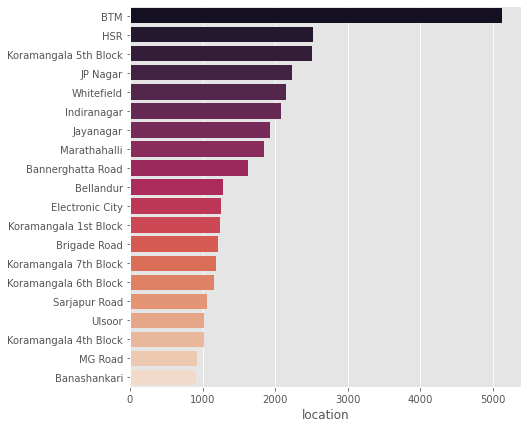

In [20]:
plt.figure(figsize=(7,7))
Rest_locations=df['location'].value_counts()[:20]
sns.barplot(Rest_locations,Rest_locations.index,palette="rocket")

1.We can see that BTM,HSR and Koranmangala 5th block has the most number of restaurants.

2.BTM dominates the section by having more than 5000 restaurants.

### Which are the most common cuisines in each locations? 

In [21]:
df_1=df.groupby(['location','cuisines']).agg('count')
data=df_1.sort_values(['url'],ascending=False).groupby(['location'],
                as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False).head(3))['url'].reset_index().rename(columns={'url':'count'})

In [22]:
data.head(10)

level_0           location               cuisines  count
0        0                BTM  North Indian, Chinese    379
1        0                BTM           North Indian    340
2        0                BTM                Biryani    120
3        1       Banashankari           South Indian     86
4        1       Banashankari  North Indian, Chinese     61
5        1       Banashankari           North Indian     36
6        2          Banaswadi           South Indian     37
7        2          Banaswadi  North Indian, Chinese     24
8        2          Banaswadi                Biryani     23
9        3  Bannerghatta Road  North Indian, Chinese    130

### Extracting location information using Geopy 

In [23]:
import geopy
dir(geopy)

['AlgoliaPlaces',
 'ArcGIS',
 'AzureMaps',
 'BANFrance',
 'Baidu',
 'BaiduV3',
 'Bing',
 'DataBC',
 'GeoNames',
 'GeocodeEarth',
 'GeocodeFarm',
 'Geolake',
 'GoogleV3',
 'Here',
 'IGNFrance',
 'LiveAddress',
 'Location',
 'MapBox',
 'MapQuest',
 'MapTiler',
 'Nominatim',
 'OpenCage',
 'OpenMapQuest',
 'Pelias',
 'Photon',
 'PickPoint',
 'Point',
 'Timezone',
 'TomTom',
 'What3Words',
 'Yandex',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'compat',
 'exc',
 'format',
 'geocoders',
 'get_geocoder_for_service',
 'location',
 'point',
 'timezone',
 'units',
 'util']

In [24]:
nom = Nominatim()
n = nom.geocode('London eye')
n

C:\Users\DELL PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.



Location(London Eye, Westminster Bridge Road, Lambeth, London Borough of Lambeth, London, Greater London, England, SE1 7PB, United Kingdom, (51.50328025, -0.11968732228242385, 0.0))

In [26]:
locations=pd.DataFrame({"Name":df['location'].unique()})
locations['Name']=locations['Name'].apply(lambda x: "Bangalore " + str(x))
lat_lon=[]
geolocator=Nominatim(timeout=4)
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)
        
locations['geo_loc']=lat_lon
locations.to_csv('locations.csv',index=False)


C:\Users\DELL PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning:

Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.



In [27]:
locations["Name"]=locations['Name'].apply(lambda x :  x.replace("Bangalore","")[1:])
locations.head()

Name                   geo_loc
0        Banashankari   (12.9152208, 77.573598)
1        Basavanagudi  (12.9417261, 77.5755021)
2         Mysore Road  (12.5523878, 76.9685867)
3           Jayanagar  (12.9292731, 77.5824229)
4  Kumaraswamy Layout  (12.9081487, 77.5553179)

We have found out latitude and longitude of each location listed in the dataset using geopy.

This is used to plot maps.

In [28]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())
Rest_locations.columns=['Name','count']
Rest_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Rest_locations['count'].max()

5124

In [29]:
lat,lon=zip(*np.array(Rest_locations['geo_loc']))
Rest_locations['lat']=lat
Rest_locations['lon']=lon
#basemap=generateBaseMap()
#HeatMap(Rest_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

### Heatmap of restaurant count on each location 

In [30]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())
Rest_locations.columns=['Name','count']
Rest_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Rest_locations['count'].max()

5124

In [31]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [32]:
lat,lon=zip(*np.array(Rest_locations['geo_loc']))
Rest_locations['lat']=lat
Rest_locations['lon']=lon
#basemap=generateBaseMap()
#HeatMap(Rest_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [33]:
def produce_chains(name):
    data_chain=pd.DataFrame(df[df["name"]==name]['location'].value_counts().reset_index())
    data_chain.columns=['Name','count']
    data_chain=data_chain.merge(locations,on="Name",how="left").dropna()
    data_chain['lan'],data_chain['lon']=zip(*data_chain['geo_loc'].values)
    return data_chain[['Name','count','lan','lon']]

In [34]:
def produce_data(col,name):
    data= pd.DataFrame(df[df[col]==name].groupby(['location'],as_index=False)['url'].agg('count'))
    data.columns=['Name','count']
    print(data.head())
    data=data.merge(locations,on="Name",how='left').dropna()
    data['lan'],data['lon']=zip(*data['geo_loc'].values)
    return data.drop(['geo_loc'],axis=1)

### What about South Indian cuisines? 

In [35]:
food=produce_data('cuisines','South Indian')
#basemap=generateBaseMap()
#HeatMap(food[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
#basemap

                Name  count
0                BTM    113
1       Banashankari     86
2          Banaswadi     37
3  Bannerghatta Road     48
4       Basavanagudi     89


In [36]:
df_1=df.groupby(['rest_type','name']).agg('count')
datas=df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],
                as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False).head(3))['url'].reset_index().rename(columns={'url':'count'})

### Which are the most popular casual dining restaurant chains? 

In [37]:
casual=datas[datas['rest_type']=='Casual Dining']
casual

level_0      rest_type                name  count
59       27  Casual Dining   Empire Restaurant     58
60       27  Casual Dining       Beijing Bites     48
61       27  Casual Dining  Mani's Dum Biryani     47

### Where are their outlets located? 

In [38]:
def produce_chains(name):
    data_chain=pd.DataFrame(df[df["name"]==name]['location'].value_counts().reset_index())
    data_chain.columns=['Name','count']
    data_chain=data_chain.merge(locations,on="Name",how="left").dropna()
    data_chain['lan'],data_chain['lon']=zip(*data_chain['geo_loc'].values)
    return data_chain[['Name','count','lan','lon']]

In [39]:
def produce_trace(data_chain,name):
        data_chain['text']=data_chain['Name']+'<br>'+data_chain['count'].astype(str)
        trace =  go.Scattermapbox(
           
                lat=data_chain['lan'],
                lon=data_chain['lon'],
                mode='markers',
                marker=go.scattermapbox.Marker(
                    size=data_chain['count']*4
                ),
                text=data_chain['text'],name=name
            )
        
        return trace

In [40]:
mapbox_access_token="pk.eyJ1Ijoic2hhaHVsZXMiLCJhIjoiY2p4ZTE5NGloMDc2YjNyczBhcDBnZnA5aCJ9.psBECQ2nub0o25PgHcU88w"

In [41]:
data=[] 
for row in casual['name']:
    data_chain=produce_chains(row) 
    trace_0=produce_trace(data_chain,row)
    data.append(trace_0)

layout = go.Layout(title="Casual Dining Restaurant chains locations around Banglore",
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,style="streets",
        center=dict(
            lat=12.96,
            lon=77.59
        ),
        pitch=0,
        zoom=10
    
     ),
)

                  

### Wordcloud of dishes liked by cuisines.  

In [42]:
df['dish_liked']=df['dish_liked'].apply(lambda x : x.split(',') if type(x)==str else [''])

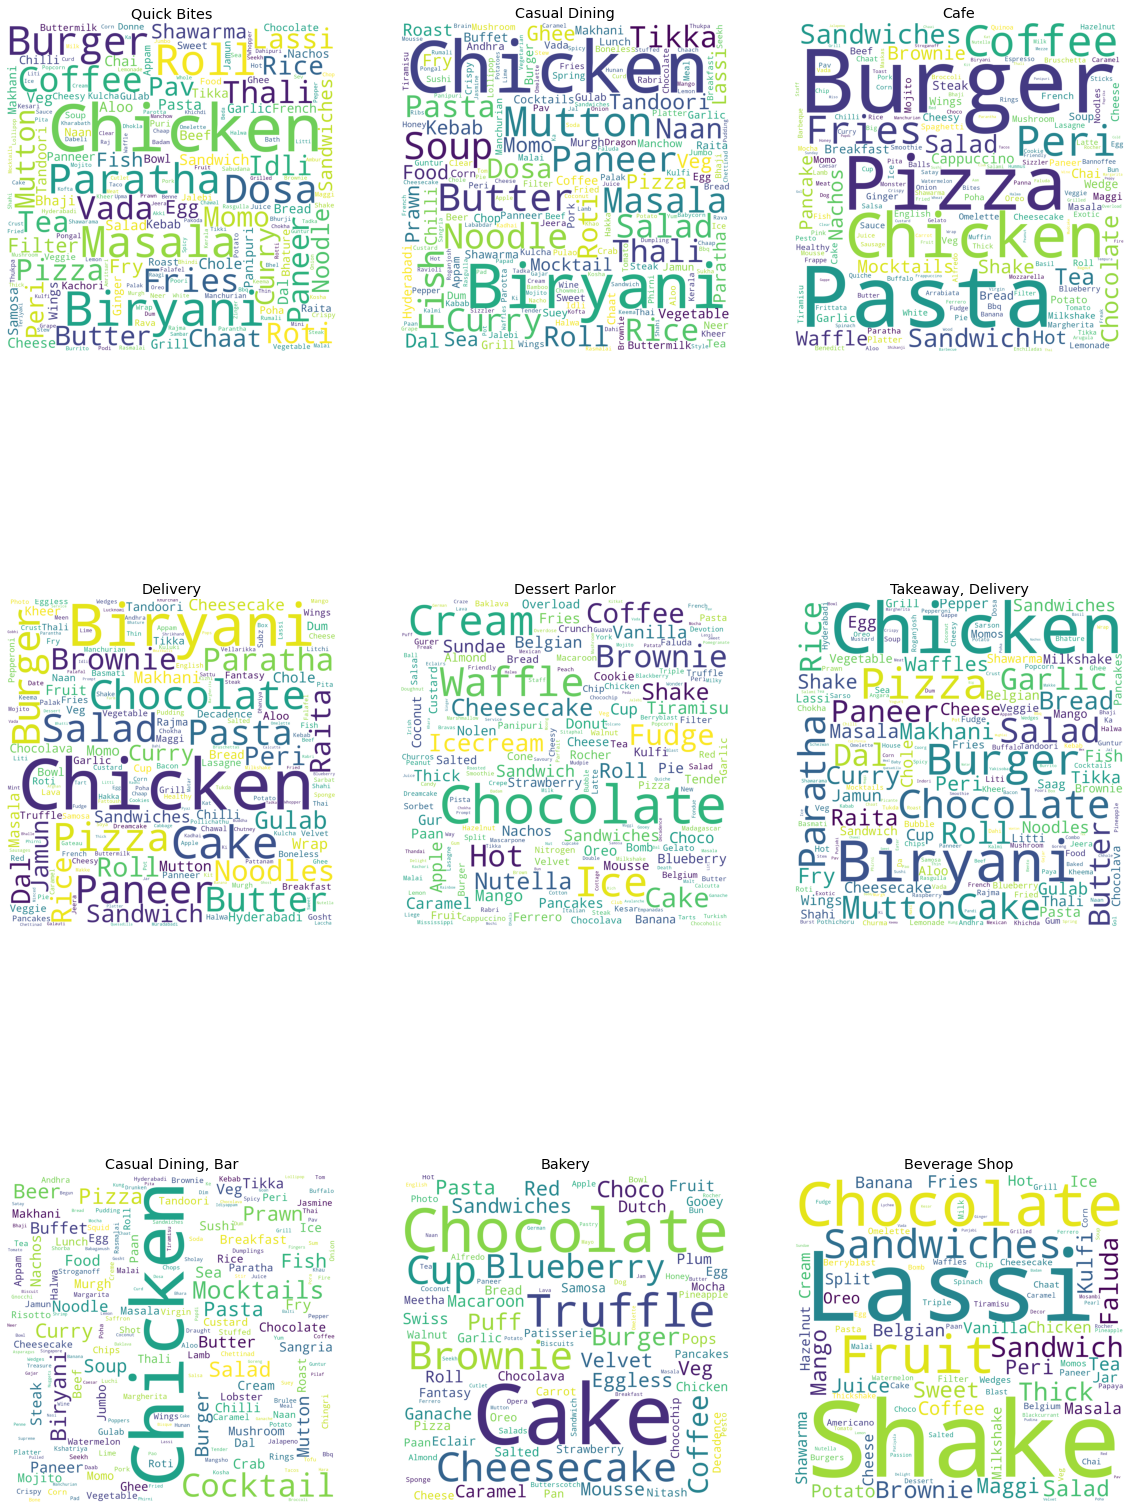

In [43]:
rest=df['rest_type'].value_counts()[:9].index
def produce_wordcloud(rest):
    
    plt.figure(figsize=(20,30))
    for i,r in enumerate(rest):
        plt.subplot(3,3,i+1)
        corpus=df[df['rest_type']==r]['dish_liked'].values.tolist()
        corpus=','.join(x  for list_words in corpus for x in list_words)
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1500, height=1500).generate(corpus)
        plt.imshow(wordcloud)
        plt.title(r)
        plt.axis("off")
        
produce_wordcloud(rest)

### Analysing Reviews

1.In this section we will go on to prepare reviews dataframe.

2.We will extract reviews and ratings of each restaurant and create a dataframe with it.

In [44]:
all_ratings = []

for name,ratings in tqdm(zip(df['name'],df['reviews_list'])):
    ratings = eval(ratings)
    for score, doc in ratings:
        if score:
            score = score.strip("Rated").strip()
            doc = doc.strip('RATED').strip()
            score = float(score)
            all_ratings.append([name,score, doc])

51717it [00:27, 1889.72it/s]


In [47]:
rating_df=pd.DataFrame(all_ratings,columns=['name','rating','review'])
rating_df['review']=rating_df['review'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x))

In [48]:
rating_df.to_csv("Ratings.csv")
rating_df.head()

name  rating                                             review
0  Jalsa     4.0  A beautiful place to dine inThe interiors take...
1  Jalsa     4.0  I was here for dinner with my family on a week...
2  Jalsa     2.0  Its a restaurant near to Banashankari BDA Me a...
3  Jalsa     4.0  We went here on a weekend and one of us had th...
4  Jalsa     5.0  The best thing about the place is its ambiance...

Text(0, 0.5, 'count')

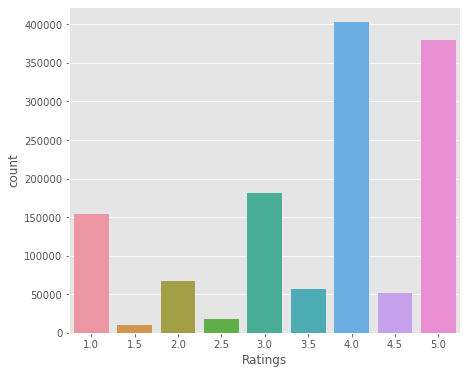

In [49]:
plt.figure(figsize=(7,6))
rating=rating_df['rating'].value_counts()
sns.barplot(x=rating.index,y=rating)
plt.xlabel("Ratings")
plt.ylabel('count')

### Topic Modeling

We will do topic modelling for postive and negative comments seperately to understand the different between the two types.

#### Topic modeling for positive comments

As the first step we will divide comments as negative and positive on the basis on rating provided.

Comments with rating below 2.5 is classified as negative and greater tham 2.5 as classified as positive.

In [50]:
rating_df['sent']=rating_df['rating'].apply(lambda x: 1 if int(x)>2.5 else 0)

### T-SNE of Reviews

(t-SNE) t-Distributed Stochastic Neighbor Embedding is a non-linear dimensionality reduction algorithm used for exploring high-dimensional data. It maps multi-dimensional data to two or more dimensions suitable for human observation. With help of the t-SNE algorithms, you may have to plot fewer exploratory data analysis plots next time you work with high dimensional data.

# In this section we will visualize words used in reviews in a 2 dimensional space.

For that we will first lemmatize and tokenize each reviews and build a corpus out of it.

In [51]:
stops=set(stopwords.words('english'))
lem=WordNetLemmatizer()
corpus=[]
for review in tqdm(rating_df['review'][:10000]):
    words=[]
    for x in word_tokenize(review):
        x=lem.lemmatize(x.lower())
        if x not in stops:
            words.append(x)
            
    corpus.append(words)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1497.48it/s]


Now we will use word2vec to represent each word as a vector.

In [52]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)

In [53]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\DELL PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



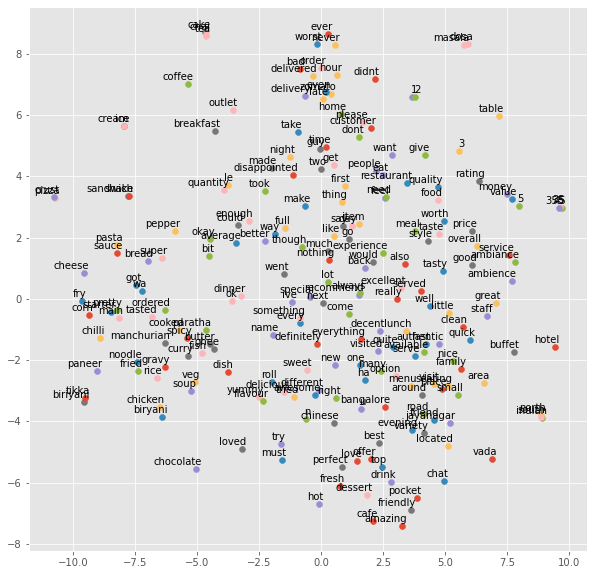

In [54]:
tsne_plot(model)

### T-SNE of adjectivs used in postive reviews

In [55]:
postive=rating_df[rating_df['rating']>3]['review'][:2000]
negative=rating_df[rating_df['rating']<2.5]['review'][:2000]

def return_corpus(df):
    corpus=[]
    for review in df:
        tagged=nltk.pos_tag(word_tokenize(review))
        adj=[]
        for x in tagged:
            if x[1]=='JJ':
                adj.append(x[0])
        corpus.append(adj)
    return corpus

C:\Users\DELL PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



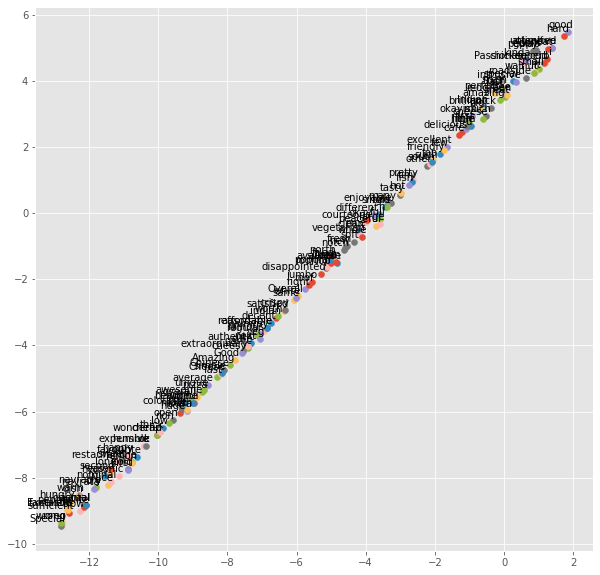

In [57]:
corpus=return_corpus(postive)
model = word2vec.Word2Vec(corpus, size=100, min_count=10,window=20, workers=4)
tsne_plot(model)

### T-SNE of adjectives used in Negative reviews

C:\Users\DELL PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



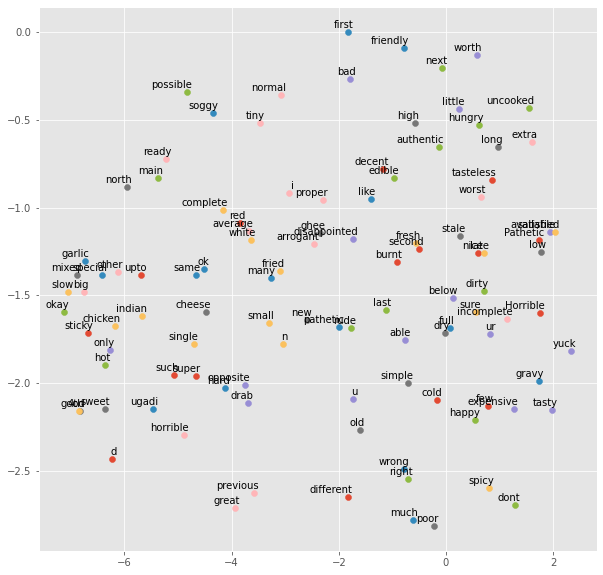

In [58]:
corpus=return_corpus(negative)
model = word2vec.Word2Vec(corpus, size=100, min_count=10,window=20, workers=4)
tsne_plot(model)

### Sentimental Analysis

Sentiment Analysis is the process of computationally determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

### Data preparation

For doing sentimental analysis on reviews provided bt users.We have to prepare our data in appropriate format. We will map reviews to positive and negative on the basis of the ratings provided by each user.So,we will map reviews to negative if the rating given is less than 2.5 and positive if rating is greater than 2.5

In [59]:
rating_df['sent']=rating_df['rating'].apply(lambda x: 1 if int(x)>2.5 else 0)

Next, we will tokenize the data and vectorize the reviews to feed it to our model

In [60]:
max_features=3000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(rating_df['review'].values)
X = tokenizer.texts_to_sequences(rating_df['review'].values)
X = pad_sequences(X)

### Building our model

In [61]:
embed_dim = 32
lstm_out = 32


model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
#model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 194, 32)           96000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 104,386
Trainable params: 104,386
Non-trainable params: 0
_________________________________________________________________
None


### Train and test split

We will now encode our target variable. pd.get_dummies is used for on-hot encoding.

33 percent of data is reserved for testing our model

In [62]:
Y = pd.get_dummies(rating_df['sent'].astype(int)).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(884378, 194) (884378, 2)
(435590, 194) (435590, 2)


In [63]:
batch_size = 3200

model.fit(X_train, Y_train, epochs = 5, batch_size=batch_size)

C:\Users\DELL PC\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.

C:\Users\DELL PC\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



Epoch 1/5


579200/884378 [==================>...........] - ETA: 54:39 - loss: 0.6935 - accuracy: 0.487 - ETA: 36:21 - loss: 0.6901 - accuracy: 0.599 - ETA: 29:00 - loss: 0.6865 - accuracy: 0.666 - ETA: 25:41 - loss: 0.6831 - accuracy: 0.700 - ETA: 23:36 - loss: 0.6795 - accuracy: 0.722 - ETA: 22:07 - loss: 0.6758 - accuracy: 0.737 - ETA: 21:16 - loss: 0.6719 - accuracy: 0.748 - ETA: 20:28 - loss: 0.6681 - accuracy: 0.755 - ETA: 20:02 - loss: 0.6639 - accuracy: 0.761 - ETA: 19:35 - loss: 0.6595 - accuracy: 0.766 - ETA: 19:14 - loss: 0.6544 - accuracy: 0.771 - ETA: 18:55 - loss: 0.6493 - accuracy: 0.775 - ETA: 18:41 - loss: 0.6440 - accuracy: 0.778 - ETA: 18:31 - loss: 0.6392 - accuracy: 0.779 - ETA: 18:26 - loss: 0.6335 - accuracy: 0.781 - ETA: 18:14 - loss: 0.6282 - accuracy: 0.782 - ETA: 18:03 - loss: 0.6220 - accuracy: 0.783 - ETA: 17:50 - loss: 0.6147 - accuracy: 0.786 - ETA: 17:39 - loss: 0.6082 - accuracy: 0.787 - ETA: 17:27 - loss: 0.6016 - accuracy: 0.789 - ETA: 17:21 - loss: 0.5959 - acc

884378/884378 [==============================] - ETA: 5:37 - loss: 0.3002 - accuracy: 0.87 - ETA: 5:33 - loss: 0.2996 - accuracy: 0.87 - ETA: 5:30 - loss: 0.2990 - accuracy: 0.87 - ETA: 5:26 - loss: 0.2984 - accuracy: 0.87 - ETA: 5:23 - loss: 0.2977 - accuracy: 0.88 - ETA: 5:19 - loss: 0.2972 - accuracy: 0.88 - ETA: 5:16 - loss: 0.2966 - accuracy: 0.88 - ETA: 5:13 - loss: 0.2960 - accuracy: 0.88 - ETA: 5:09 - loss: 0.2954 - accuracy: 0.88 - ETA: 5:06 - loss: 0.2949 - accuracy: 0.88 - ETA: 5:03 - loss: 0.2942 - accuracy: 0.88 - ETA: 4:59 - loss: 0.2937 - accuracy: 0.88 - ETA: 4:55 - loss: 0.2931 - accuracy: 0.88 - ETA: 4:52 - loss: 0.2925 - accuracy: 0.88 - ETA: 4:49 - loss: 0.2919 - accuracy: 0.88 - ETA: 4:45 - loss: 0.2913 - accuracy: 0.88 - ETA: 4:42 - loss: 0.2906 - accuracy: 0.88 - ETA: 4:38 - loss: 0.2901 - accuracy: 0.88 - ETA: 4:35 - loss: 0.2896 - accuracy: 0.88 - ETA: 4:31 - loss: 0.2890 - accuracy: 0.88 - ETA: 4:28 - loss: 0.2884 - accuracy: 0.88 - ETA: 4:24 - loss: 0.2878 - 

576000/884378 [==================>...........] - ETA: 19:32 - loss: 0.1583 - accuracy: 0.941 - ETA: 19:15 - loss: 0.1670 - accuracy: 0.937 - ETA: 18:47 - loss: 0.1684 - accuracy: 0.937 - ETA: 18:36 - loss: 0.1705 - accuracy: 0.935 - ETA: 18:28 - loss: 0.1697 - accuracy: 0.935 - ETA: 18:13 - loss: 0.1682 - accuracy: 0.935 - ETA: 18:00 - loss: 0.1679 - accuracy: 0.934 - ETA: 17:47 - loss: 0.1662 - accuracy: 0.935 - ETA: 17:29 - loss: 0.1655 - accuracy: 0.935 - ETA: 17:14 - loss: 0.1645 - accuracy: 0.935 - ETA: 16:59 - loss: 0.1658 - accuracy: 0.935 - ETA: 16:46 - loss: 0.1667 - accuracy: 0.934 - ETA: 16:34 - loss: 0.1658 - accuracy: 0.935 - ETA: 16:24 - loss: 0.1661 - accuracy: 0.935 - ETA: 16:18 - loss: 0.1663 - accuracy: 0.935 - ETA: 16:13 - loss: 0.1665 - accuracy: 0.935 - ETA: 16:09 - loss: 0.1660 - accuracy: 0.935 - ETA: 16:04 - loss: 0.1653 - accuracy: 0.935 - ETA: 16:03 - loss: 0.1650 - accuracy: 0.935 - ETA: 16:05 - loss: 0.1647 - accuracy: 0.936 - ETA: 16:06 - loss: 0.1646 - acc

884378/884378 [==============================] - ETA: 6:16 - loss: 0.1574 - accuracy: 0.93 - ETA: 6:12 - loss: 0.1574 - accuracy: 0.93 - ETA: 6:09 - loss: 0.1574 - accuracy: 0.93 - ETA: 6:05 - loss: 0.1574 - accuracy: 0.93 - ETA: 6:01 - loss: 0.1574 - accuracy: 0.93 - ETA: 5:58 - loss: 0.1573 - accuracy: 0.93 - ETA: 5:54 - loss: 0.1572 - accuracy: 0.93 - ETA: 5:50 - loss: 0.1572 - accuracy: 0.93 - ETA: 5:46 - loss: 0.1571 - accuracy: 0.93 - ETA: 5:42 - loss: 0.1570 - accuracy: 0.93 - ETA: 5:38 - loss: 0.1570 - accuracy: 0.93 - ETA: 5:34 - loss: 0.1570 - accuracy: 0.93 - ETA: 5:31 - loss: 0.1571 - accuracy: 0.93 - ETA: 5:27 - loss: 0.1571 - accuracy: 0.93 - ETA: 5:23 - loss: 0.1571 - accuracy: 0.93 - ETA: 5:19 - loss: 0.1569 - accuracy: 0.93 - ETA: 5:15 - loss: 0.1569 - accuracy: 0.93 - ETA: 5:11 - loss: 0.1569 - accuracy: 0.93 - ETA: 5:07 - loss: 0.1568 - accuracy: 0.93 - ETA: 5:04 - loss: 0.1568 - accuracy: 0.93 - ETA: 5:00 - loss: 0.1568 - accuracy: 0.93 - ETA: 4:56 - loss: 0.1568 - 

569600/884378 [==================>...........] - ETA: 17:37 - loss: 0.1428 - accuracy: 0.943 - ETA: 16:56 - loss: 0.1449 - accuracy: 0.941 - ETA: 17:32 - loss: 0.1447 - accuracy: 0.942 - ETA: 20:07 - loss: 0.1429 - accuracy: 0.945 - ETA: 20:43 - loss: 0.1449 - accuracy: 0.944 - ETA: 20:44 - loss: 0.1451 - accuracy: 0.944 - ETA: 21:22 - loss: 0.1466 - accuracy: 0.944 - ETA: 21:02 - loss: 0.1460 - accuracy: 0.943 - ETA: 20:30 - loss: 0.1453 - accuracy: 0.944 - ETA: 20:05 - loss: 0.1456 - accuracy: 0.943 - ETA: 20:09 - loss: 0.1452 - accuracy: 0.943 - ETA: 20:33 - loss: 0.1452 - accuracy: 0.944 - ETA: 20:14 - loss: 0.1455 - accuracy: 0.944 - ETA: 20:01 - loss: 0.1453 - accuracy: 0.944 - ETA: 19:48 - loss: 0.1445 - accuracy: 0.944 - ETA: 19:40 - loss: 0.1440 - accuracy: 0.945 - ETA: 19:31 - loss: 0.1439 - accuracy: 0.944 - ETA: 19:22 - loss: 0.1436 - accuracy: 0.945 - ETA: 19:10 - loss: 0.1435 - accuracy: 0.945 - ETA: 19:00 - loss: 0.1433 - accuracy: 0.945 - ETA: 18:59 - loss: 0.1432 - acc

884378/884378 [==============================] - ETA: 8:37 - loss: 0.1406 - accuracy: 0.94 - ETA: 8:32 - loss: 0.1406 - accuracy: 0.94 - ETA: 8:27 - loss: 0.1406 - accuracy: 0.94 - ETA: 8:22 - loss: 0.1406 - accuracy: 0.94 - ETA: 8:17 - loss: 0.1406 - accuracy: 0.94 - ETA: 8:11 - loss: 0.1405 - accuracy: 0.94 - ETA: 8:06 - loss: 0.1405 - accuracy: 0.94 - ETA: 8:01 - loss: 0.1405 - accuracy: 0.94 - ETA: 7:56 - loss: 0.1404 - accuracy: 0.94 - ETA: 7:51 - loss: 0.1404 - accuracy: 0.94 - ETA: 7:45 - loss: 0.1405 - accuracy: 0.94 - ETA: 7:40 - loss: 0.1404 - accuracy: 0.94 - ETA: 7:35 - loss: 0.1404 - accuracy: 0.94 - ETA: 7:30 - loss: 0.1404 - accuracy: 0.94 - ETA: 7:25 - loss: 0.1404 - accuracy: 0.94 - ETA: 7:19 - loss: 0.1405 - accuracy: 0.94 - ETA: 7:14 - loss: 0.1405 - accuracy: 0.94 - ETA: 7:09 - loss: 0.1405 - accuracy: 0.94 - ETA: 7:04 - loss: 0.1405 - accuracy: 0.94 - ETA: 6:59 - loss: 0.1405 - accuracy: 0.94 - ETA: 6:53 - loss: 0.1405 - accuracy: 0.94 - ETA: 6:48 - loss: 0.1404 - 

569600/884378 [==================>...........] - ETA: 24:41 - loss: 0.1408 - accuracy: 0.946 - ETA: 24:03 - loss: 0.1337 - accuracy: 0.950 - ETA: 23:29 - loss: 0.1396 - accuracy: 0.947 - ETA: 23:26 - loss: 0.1338 - accuracy: 0.950 - ETA: 23:33 - loss: 0.1311 - accuracy: 0.951 - ETA: 23:37 - loss: 0.1289 - accuracy: 0.952 - ETA: 23:37 - loss: 0.1287 - accuracy: 0.951 - ETA: 23:32 - loss: 0.1303 - accuracy: 0.951 - ETA: 23:27 - loss: 0.1299 - accuracy: 0.951 - ETA: 23:24 - loss: 0.1294 - accuracy: 0.951 - ETA: 23:21 - loss: 0.1302 - accuracy: 0.951 - ETA: 23:18 - loss: 0.1314 - accuracy: 0.951 - ETA: 23:15 - loss: 0.1319 - accuracy: 0.951 - ETA: 23:11 - loss: 0.1319 - accuracy: 0.951 - ETA: 23:07 - loss: 0.1314 - accuracy: 0.951 - ETA: 23:03 - loss: 0.1312 - accuracy: 0.951 - ETA: 22:59 - loss: 0.1316 - accuracy: 0.951 - ETA: 22:55 - loss: 0.1310 - accuracy: 0.951 - ETA: 22:52 - loss: 0.1323 - accuracy: 0.950 - ETA: 22:47 - loss: 0.1317 - accuracy: 0.951 - ETA: 22:42 - loss: 0.1310 - acc

884378/884378 [==============================] - ETA: 8:44 - loss: 0.1282 - accuracy: 0.95 - ETA: 8:39 - loss: 0.1281 - accuracy: 0.95 - ETA: 8:34 - loss: 0.1281 - accuracy: 0.95 - ETA: 8:28 - loss: 0.1281 - accuracy: 0.95 - ETA: 8:23 - loss: 0.1281 - accuracy: 0.95 - ETA: 8:18 - loss: 0.1282 - accuracy: 0.95 - ETA: 8:12 - loss: 0.1281 - accuracy: 0.95 - ETA: 8:07 - loss: 0.1281 - accuracy: 0.95 - ETA: 8:02 - loss: 0.1281 - accuracy: 0.95 - ETA: 7:56 - loss: 0.1282 - accuracy: 0.95 - ETA: 7:51 - loss: 0.1282 - accuracy: 0.95 - ETA: 7:45 - loss: 0.1282 - accuracy: 0.95 - ETA: 7:40 - loss: 0.1282 - accuracy: 0.95 - ETA: 7:35 - loss: 0.1282 - accuracy: 0.95 - ETA: 7:29 - loss: 0.1282 - accuracy: 0.95 - ETA: 7:24 - loss: 0.1282 - accuracy: 0.95 - ETA: 7:19 - loss: 0.1282 - accuracy: 0.95 - ETA: 7:13 - loss: 0.1282 - accuracy: 0.95 - ETA: 7:08 - loss: 0.1282 - accuracy: 0.95 - ETA: 7:02 - loss: 0.1282 - accuracy: 0.95 - ETA: 6:57 - loss: 0.1282 - accuracy: 0.95 - ETA: 6:52 - loss: 0.1282 - 

569600/884378 [==================>...........] - ETA: 24:13 - loss: 0.1163 - accuracy: 0.958 - ETA: 24:42 - loss: 0.1179 - accuracy: 0.957 - ETA: 24:40 - loss: 0.1163 - accuracy: 0.957 - ETA: 24:34 - loss: 0.1167 - accuracy: 0.957 - ETA: 24:31 - loss: 0.1168 - accuracy: 0.956 - ETA: 24:28 - loss: 0.1194 - accuracy: 0.955 - ETA: 24:25 - loss: 0.1196 - accuracy: 0.955 - ETA: 24:19 - loss: 0.1212 - accuracy: 0.953 - ETA: 24:14 - loss: 0.1222 - accuracy: 0.953 - ETA: 24:08 - loss: 0.1224 - accuracy: 0.953 - ETA: 24:03 - loss: 0.1217 - accuracy: 0.953 - ETA: 23:59 - loss: 0.1214 - accuracy: 0.953 - ETA: 23:48 - loss: 0.1213 - accuracy: 0.953 - ETA: 23:42 - loss: 0.1211 - accuracy: 0.954 - ETA: 23:38 - loss: 0.1206 - accuracy: 0.954 - ETA: 23:33 - loss: 0.1208 - accuracy: 0.954 - ETA: 23:29 - loss: 0.1206 - accuracy: 0.954 - ETA: 23:24 - loss: 0.1203 - accuracy: 0.954 - ETA: 23:19 - loss: 0.1202 - accuracy: 0.955 - ETA: 23:14 - loss: 0.1203 - accuracy: 0.955 - ETA: 23:09 - loss: 0.1203 - acc

884378/884378 [==============================] - ETA: 8:50 - loss: 0.1193 - accuracy: 0.95 - ETA: 8:44 - loss: 0.1194 - accuracy: 0.95 - ETA: 8:39 - loss: 0.1193 - accuracy: 0.95 - ETA: 8:33 - loss: 0.1193 - accuracy: 0.95 - ETA: 8:28 - loss: 0.1192 - accuracy: 0.95 - ETA: 8:22 - loss: 0.1192 - accuracy: 0.95 - ETA: 8:17 - loss: 0.1192 - accuracy: 0.95 - ETA: 8:12 - loss: 0.1192 - accuracy: 0.95 - ETA: 8:06 - loss: 0.1191 - accuracy: 0.95 - ETA: 8:01 - loss: 0.1191 - accuracy: 0.95 - ETA: 7:55 - loss: 0.1191 - accuracy: 0.95 - ETA: 7:50 - loss: 0.1190 - accuracy: 0.95 - ETA: 7:44 - loss: 0.1191 - accuracy: 0.95 - ETA: 7:39 - loss: 0.1191 - accuracy: 0.95 - ETA: 7:33 - loss: 0.1191 - accuracy: 0.95 - ETA: 7:28 - loss: 0.1191 - accuracy: 0.95 - ETA: 7:22 - loss: 0.1191 - accuracy: 0.95 - ETA: 7:17 - loss: 0.1191 - accuracy: 0.95 - ETA: 7:11 - loss: 0.1192 - accuracy: 0.95 - ETA: 7:06 - loss: 0.1191 - accuracy: 0.95 - ETA: 7:00 - loss: 0.1191 - accuracy: 0.95 - ETA: 6:55 - loss: 0.1191 - 

### Validating our model

We will take 1500 rows to validate our model.We have choosen accuacy to be our evaluation criteria

In [64]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 0.11
acc: 0.96
